# Lesson 29: Capstone Class - Meteorite Landings 

---

#### Data-Set Loading | Data Processing & Cleaning | Data Analysis

Dataset Link:

https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv


In [3]:
# 1. Import the necessary libraries for this class and create a DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

met_df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv')

# 2. Finding the number of rows and columns in the DataFrame. 
print(met_df.shape)

# 3. Rows containing the year values less than 860 and greater than 2016.
correct_years_df = met_df[(met_df['year'] >= 860) & (met_df['year'] <= 2016)]

# 4. Rows having the 'reclong' values greater than or equal to -180 degrees and less than or equal to 180 degrees.
correct_long_df = correct_years_df[(correct_years_df['reclong'] >= -180) & (correct_years_df['reclong'] <= 180)]

# 5. Rows containing the '0 reclat' and '0 reclong' values from the 'correct_long_df'.
correct_lat_long_df = correct_long_df[~((correct_long_df['reclat'] == 0 ) & (correct_long_df['reclong'] == 0))]

# 6. Indices of the rows having missing mass values.
row_indices = correct_lat_long_df[correct_lat_long_df['mass'].isnull() == True].index

# 7. Missing values in the 'mass' column in the 'correct_lat_long_df' DataFrame with median of mass.
median_mass = correct_lat_long_df['mass'].median()
correct_lat_long_df.loc[row_indices, 'mass'] = median_mass

# 8. Convert the 'year' values into integer type values.
correct_lat_long_df.loc[:, 'year'] = correct_lat_long_df.loc[:, 'year'].astype('int')

(45716, 10)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


---

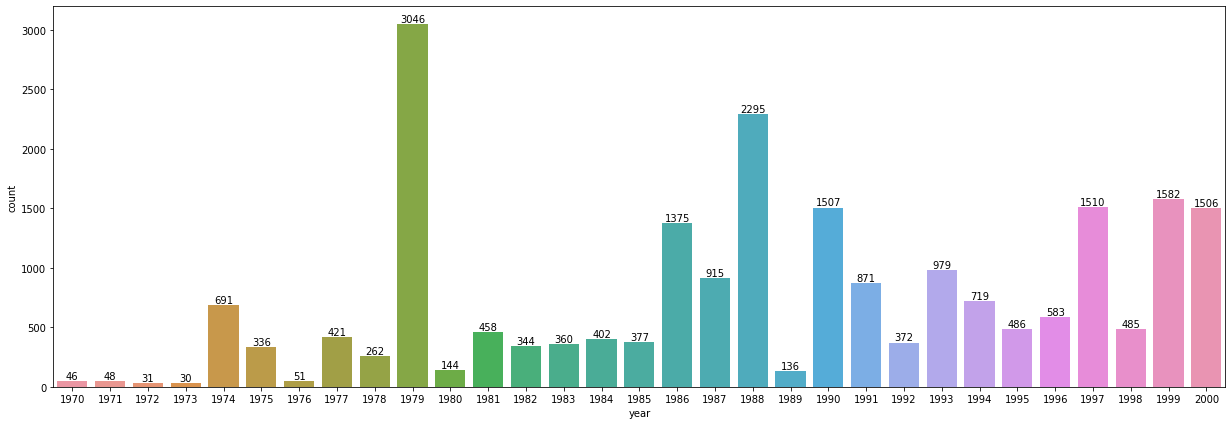

In [4]:
# Annotated bars in the count plot for the meteorites fallen between the years 1970 and 2000 (including both).
import seaborn as sns
plt.figure(figsize=(21, 7))
cp = sns.countplot(x='year', data=correct_lat_long_df[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 2001)])
for p in cp.patches:
  cp.annotate(str(p.get_height()), xy=(p.get_x() + p.get_width() / 2, p.get_height()),
              ha='center', va='bottom')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


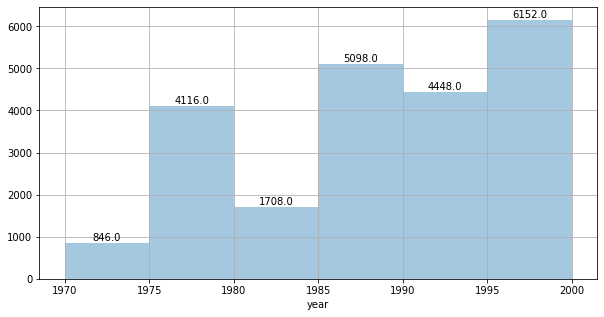

In [5]:
# Annotated a histogram created using the 'distplot()' function.
plt.figure(figsize=(10, 5))
dp = sns.distplot(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 2001), 'year'], bins=6, kde=False)
for patch in dp.patches:
  dp.annotate(str(patch.get_height()), xy=(patch.get_x() + patch.get_width() / 2, patch.get_height()),
              ha='center', va='bottom')

plt.grid()
plt.show()

In [6]:
# Create a DataFrame called 'found_relict_df' and store data only for those meteorites which were actually found.
found_relict_df = correct_lat_long_df[(correct_lat_long_df['fall'] == 'Found') & (correct_lat_long_df['nametype'] == 'Relict')]
found_relict_df

name     id  ...    reclong               GeoLocation
5182               Brunflo   5157  ...   14.28333    (63.116670, 14.283330)
6810   David Glacier 92308   6614  ...  162.00000  (-75.316670, 162.000000)
12627                 Gove  52859  ...  136.83833  (-12.263330, 136.838330)
15944        Gullhögen 001  44889  ...   13.80000    (58.383330, 13.800000)
20674    Lewis Cliff 87241  13702  ...  161.31058  (-84.345630, 161.310580)
...                    ...    ...  ...        ...                       ...
31072       Österplana 060  56159  ...   13.43333    (58.583330, 13.433330)
31073       Österplana 061  56160  ...   13.43333    (58.583330, 13.433330)
31074       Österplana 062  56161  ...   13.43333    (58.583330, 13.433330)
31075       Österplana 063  56162  ...   13.43333    (58.583330, 13.433330)
31076       Österplana 064  56163  ...   13.43333    (58.583330, 13.433330)

[69 rows x 10 columns]

In [7]:
# Create a DataFrame called 'found_valid_df' and store data only for those meteorites which were actually found.
found_valid_df = correct_lat_long_df[(correct_lat_long_df['fall'] == 'Found') & (correct_lat_long_df['nametype'] == 'Valid')]
found_valid_df

name     id  ...    reclong               GeoLocation
1108             Abajo      4  ... -105.41667  (26.800000, -105.416670)
1109   Abar al' Uj 001  51399  ...   48.95937    (22.721920, 48.959370)
1110            Abbott      5  ... -104.28333  (36.300000, -104.283330)
1111         Abernathy      7  ... -101.80000  (33.850000, -101.800000)
1112               Abo      8  ...   22.30000    (60.433330, 22.300000)
...                ...    ...  ...        ...                       ...
45711       Zillah 002  31356  ...   17.01850    (29.037000, 17.018500)
45712           Zinder  30409  ...    8.96667     (13.783330, 8.966670)
45713             Zlin  30410  ...   17.66667    (49.250000, 17.666670)
45714        Zubkovsky  31357  ...   41.50460    (49.789170, 41.504600)
45715       Zulu Queen  30414  ... -115.68333  (33.983330, -115.683330)

[30871 rows x 10 columns]

In [8]:
# Create a cartogram for the landing sites of the meteorites found in the withered condition.
import folium
map1 = folium.Map(location=[0, 0], width='90%', height='90%', tiles='Stamen Toner', zoom_start=1)

for i in found_relict_df.index:
  folium.Marker(location=[found_relict_df.loc[i, 'reclat'], found_relict_df.loc[i, 'reclong']],
                popup=found_relict_df.loc[i, 'name']).add_to(map1)

map1

In [9]:
# Create a cartogram for the meteorites found in good condition after the year 2010. Popup the location name.
map2 = folium.Map(location=[0.0, 0.0], width='90%', height='80%', tiles='Stamen Toner', zoom_start=1.5)

for i in found_valid_df[found_valid_df['year'] > 2010].index:
  folium.Marker(location=[found_valid_df.loc[i, 'reclat'], found_valid_df.loc[i, 'reclong']],
                popup=found_valid_df.loc[i, 'name']).add_to(map2)

map2

In [10]:
# Create a cartogram for the meteorites found in good condition from 2008 to 2010 (both inclusive).
map3 = folium.Map(location=[0, 0], width='90%', height='85%', tiles='Stamen Toner', zoom_start=1.5)

for i in found_valid_df[(found_valid_df['year'] > 2007) & (found_valid_df['year'] <= 2010)].index:
  folium.Marker(location=[found_valid_df.loc[i, 'reclat'], found_valid_df.loc[i, 'reclong']],
              popup=found_valid_df.loc[i, 'name']).add_to(map3)

map3

In [11]:
# Create a cartogram for the meteorites found in good condition from 2005 to 2007 (both inclusive).
map4 = folium.Map(location=[0, 0], width='90%', height='85%', tiles='Stamen Toner', zoom_start=1.5)

for i in found_valid_df[(found_valid_df['year'] > 2004) & (found_valid_df['year'] <= 2007)].index:
  folium.Marker(location=[found_valid_df.loc[i, 'reclat'], found_valid_df.loc[i, 'reclong']],
              popup=found_valid_df.loc[i, 'name']).add_to(map4)

map4

#### Meteorite Class-wise Histograms

The number of unique classes of meteorites present in the dataset.

In [12]:
# Calculate the number of unique classes of meteorites.
len(correct_lat_long_df['recclass'].unique())

394

There are 394 different classes of meteorites. 

In [13]:
# Count of the fall of the different classes of meteorites.
correct_lat_long_df['recclass'].value_counts()

L6         6529
H5         5590
H4         3324
H6         3231
L5         2725
           ... 
L/LL          1
L3.7-4        1
L3.8-an       1
H3.8-6        1
H/L5          1
Name: recclass, Length: 394, dtype: int64

The `value_counts()` function returns a Pandas series.

In [14]:
# Store the 'correct_lat_long_df['recclass'].value_counts()' Pandas series in a new variable.
met_class_counts = correct_lat_long_df['recclass'].value_counts()
met_class_counts

L6         6529
H5         5590
H4         3324
H6         3231
L5         2725
           ... 
L/LL          1
L3.7-4        1
L3.8-an       1
H3.8-6        1
H/L5          1
Name: recclass, Length: 394, dtype: int64

Display the top 10 classes of the meteorites with the highest number of falls.

In [15]:
# Display the top 10 most number of fallen meteorite classes.
met_class_counts[:10].index

Index(['L6', 'H5', 'H4', 'H6', 'L5', 'LL5', 'LL6', 'L4', 'H4/5', 'CM2'], dtype='object')

Create a histogram for the top ten most number of fallen class of meteorites to see if there is any kind of similarity in the pattern of their falls. Make sure that each histogram has exactly 50 bins.

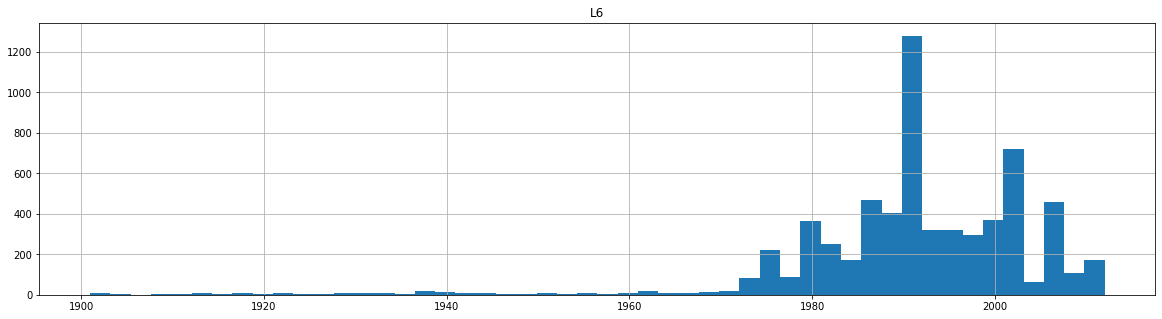

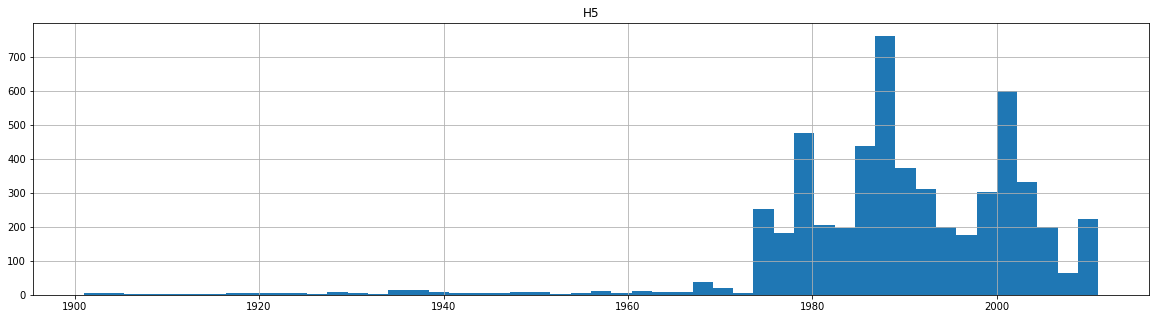

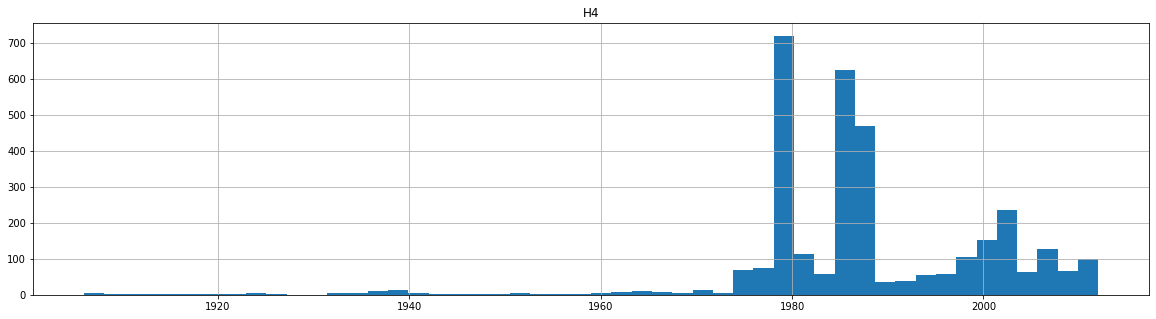

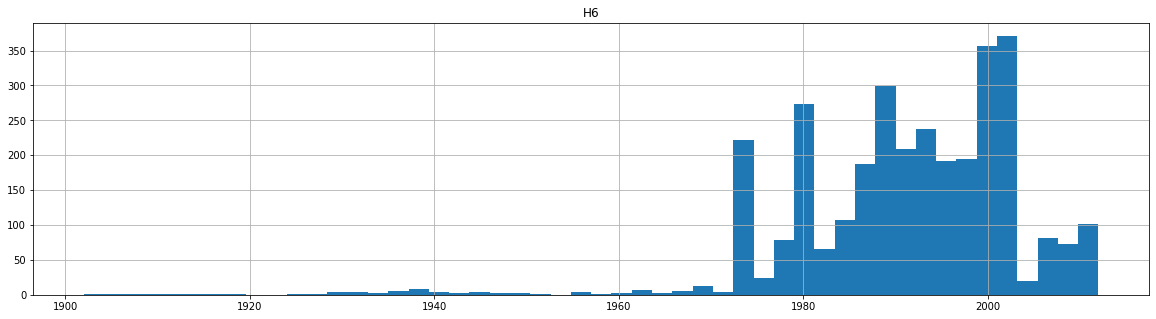

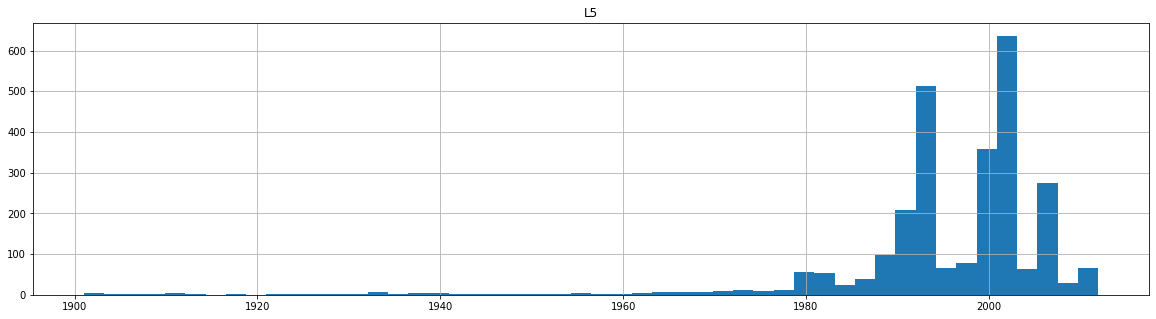

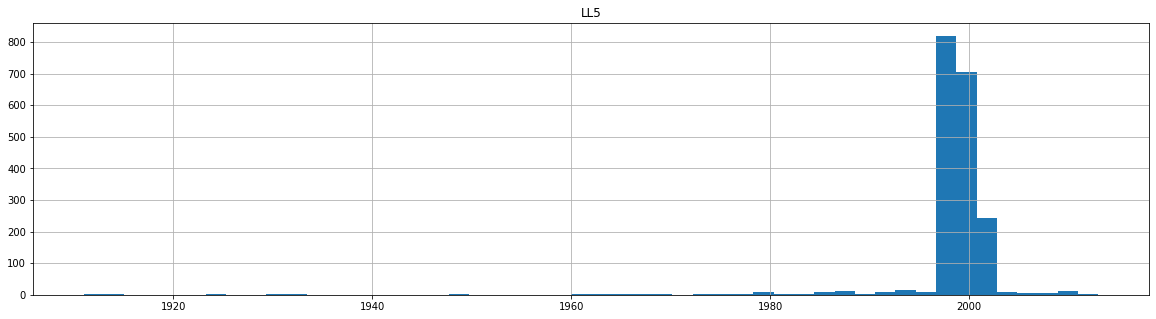

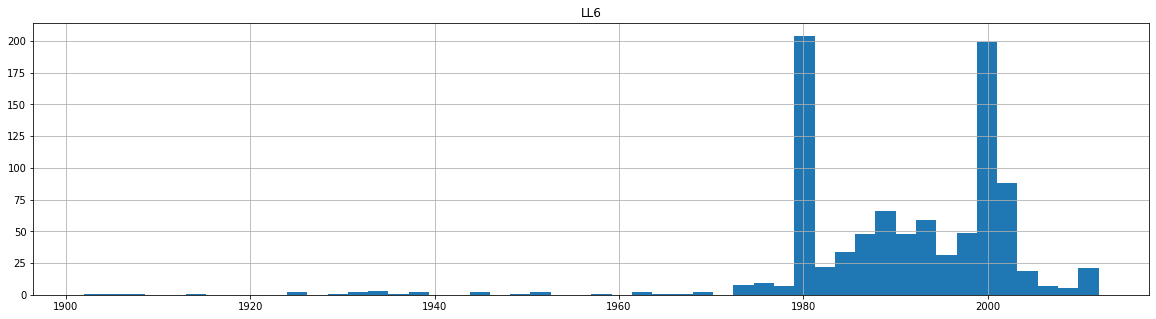

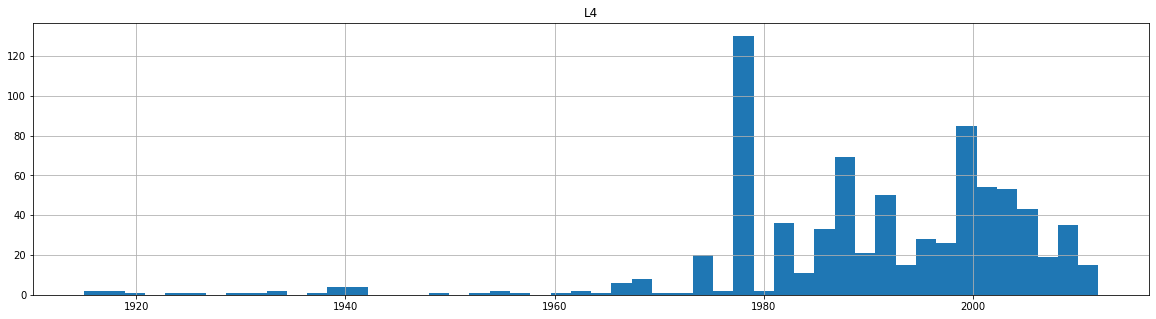

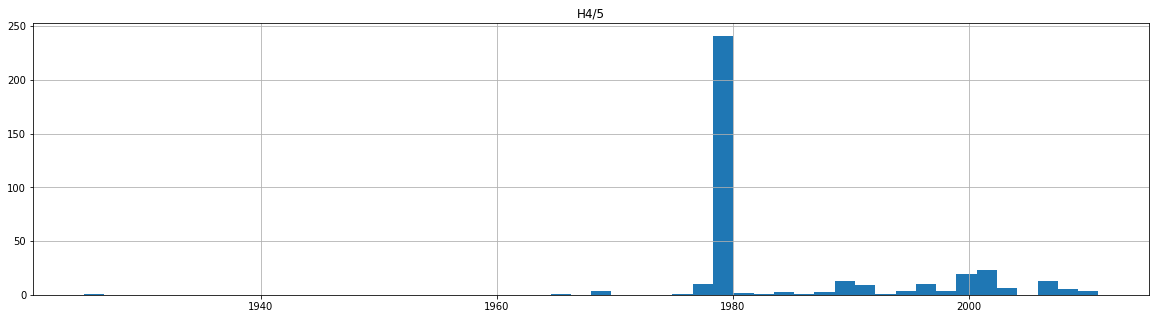

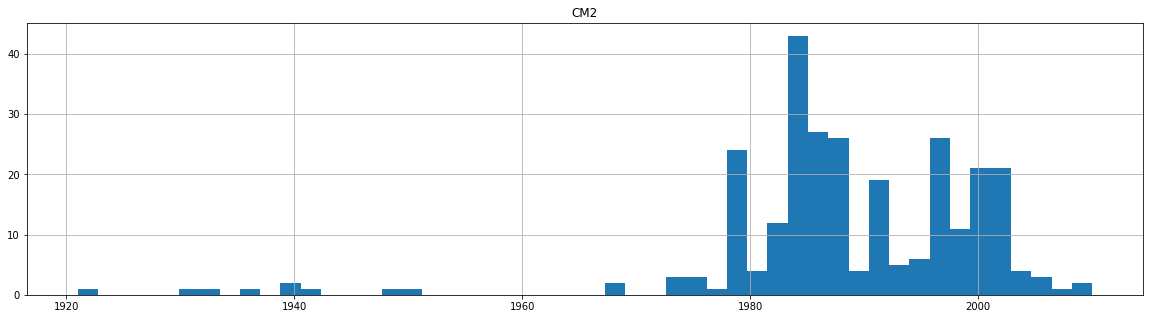

In [16]:
# Plot the histograms for the top 10 most number of fallen meteorite classes using the 'hist()' function.
for c in met_class_counts[:10].index:
  plt.figure(figsize=(20, 5))
  plt.title(c) # The 'title()' function adds a title to the graph. Here, we are providing the meteorite class as a title.
  plt.hist(correct_lat_long_df.loc[(correct_lat_long_df['recclass'] == c) & (correct_lat_long_df['year'] > 1900), 'year'], bins=50)
  plt.grid()
  plt.show()

There is no definite recognisable pattern in the fall of the meteorites over the years for a class of a meteorite. 

The only concrete observation that we can make from the histograms is that the most number of `LL5` class meteorites fell between the years 1995 and 2005 and the most number of the `H4/5` class meteorites fell between the years 1975 and 1980. 



---

#### Activity 2: Percentage of Ordinary Chondrites^

Before we go into more details of chondrites and chondrules, let's compute the percentage of ordinary chondrites that have fallen on Earth given in the dataset.

Here's a list of different types of ordinary chondrites.

|Subtype|Distinguishing features/Chondrule character|Letter designation|
|-|-|-|
|H|Abundant|H3-H3,9|
||Distinct|H4|
||Less distinct|H5|
||Indistinct|H6|
||Melted|H7|
||||
|L|Abundant|L3-L3,9|
||Distinct|L4|
||Less distinct|L5|
||Indistinct|L6|
||Melted|L7|
||||
|LL|Abundant|LL3-LL3,9|
||Distinct|LL4|
||Less distinct|LL5|
||Indistinct|LL6|
||Melted|LL7|

*Source: https://en.wikipedia.org/wiki/Chondrite*

If you list out the top 10 meteorites in the DataFrame, you will notice that except for the `CM2`, all other meteorites are ordinary chondrites.


In [17]:
# Student Action: Display the top 10 most number of classes of meteorites fallen on Earth.
met_class_counts[:10].index

Index(['L6', 'H5', 'H4', 'H6', 'L5', 'LL5', 'LL6', 'L4', 'H4/5', 'CM2'], dtype='object')

Notice that among the top 10 classes of meteorites that fall on Earth, 9 classes are ordinary chondrites. In the above list, except for the `CM2` class, all other classes of meteorites are chondrites.

Now, using the table above, let's create a Python list containing the ordinary chondrites to calculate the percentage of ordinary chondrites in the `correct_lat_long_df` DataFrame.

In [18]:
# Student Action: Run the code below to create a list containing letter designations of the ordinary chondrites.
ord_chon = ['H3-H3,9', 'H4', 'H5', 'H6', 'H7', 'L3-L3,9', 'L4', 'L5', 'L6', 'L7', 'LL3-LL3,9', 'LL4', 'LL5', 'LL6', 'LL7', 'H', 'L', 'LL', 'H-H']

The above list contains the letter designations of most of the ordinary chondrites that we have in the `correct_lat_long_df` DataFrame. There can be more ordinary chondrites. But using the above list, we can find out the minimum number of ordinary chondrites in the `correct_lat_long_df` DataFrame.

Let's calculate the percentage of the ordinary chondrites fallen on Earth.

In [19]:
# Student Action: Calculate the percentage of ordinary chondrites fallen on Earth.
total = 0

for oc in ord_chon: # 'oc' stands for ordinary chondrites
  for c in correct_lat_long_df['recclass']: # 'c' stands for class.
    if oc == c:
      total += 1

print("Total number of ordinary chondrites =", total, 
      '\nPercentage of number of ordinary chondrites =', round(total * 100 / correct_lat_long_df.shape[0], 2), '%')

Total number of ordinary chondrites = 25589 
Percentage of number of ordinary chondrites = 79.88 %


In the above code:

1. We have created a variable (`total`) to store the total counts of the ordinary chondrites in the `correct_lat_long_df` DataFrame.

2. Using the `for` loop, we iterate through each item contained in the `ord_chon` list. Using another `for` loop, we iterate through each item contained in the `correct_lat_long_df['recclass']` series.

  - Inside the inner `for` loop, we compare each item of the `ord_chon` list with each item of the `correct_lat_long_df['recclass']` series.

  - If the above two items are the same, then we increase the value stored in the `total` variable by one.

- Using the `print()` function, we printed the total counts and percentage of the ordinary chondrites in the `correct_lat_long_df` DataFrame.

**The `round()` Function**

The `round()` function rounds off a float value up to a fixed number of digits after the decimal. 

**Syntax:** `round(some_float_value, number_of_digits)`

where 

- `some_float_value` is the value that needs to be rounded off and

- `number_of_digits` is the number of digits to be kept after the decimal.

E.g., `round(21.8794, 2)` will return `21.89` as an output.


In [20]:
# Student Action: Round off the 21.8794 value up to 2 digits after the decimal.
round(21.8794, 2)

21.88

We confirmed that at least 79% of the meteorites are ordinary chondrites in the `correct_lat_long_df` DataFrame. 

According to Wikipedia, *Ordinary chondrites are by far the most common type of meteorite to fall to Earth: about 80% of all meteorites and over 90% of chondrites are ordinary chondrites.*

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/ordinary-chondrites-wiki.png'>

As per our calculation, at least 79% per cent of the meteorites fallen on Earth are ordinary chondrites. Our calculation is very close to Wikipedia's claim.

There are more chondrites in the DataFrame, but finding them out manually is a laborious task. If we display all the classes of meteorites, you will realise how messed-up the data is.

---

#### Activity 3: The `unique()` Function^^

Let's create a list of all the unique classes of meteorites in the `correct_lat_long_df` DataFrame to see the different classes of meteorites. We already know that there are 394 different classes of meteorites.

In [21]:
# Student Action: Create a list of all the unique classes of meteorites in the 'correct_lat_long_df' DataFrame.
unique_meteorite_classes = correct_lat_long_df['recclass'].unique()
# We already know that there are 394 different classes of meteorites. Let's confirm it.
print(len(unique_meteorite_classes))
unique_meteorite_classes

394


array(['L5', 'H6', 'EH4', 'Acapulcoite', 'L6', 'LL3-6', 'H5', 'L',
       'Diogenite-pm', 'Unknown', 'H4', 'H', 'Iron, IVA', 'CR2-an', 'LL5',
       'CI1', 'L/LL4', 'Eucrite-mmict', 'CV3', 'Ureilite-an',
       'Stone-uncl', 'L3', 'Angrite', 'LL6', 'L4', 'Aubrite',
       'Iron, IIAB', 'Iron, IAB-sLL', 'Iron, ungrouped', 'CM2', 'OC',
       'Mesosiderite-A1', 'LL4', 'C2-ung', 'LL3.8', 'Howardite',
       'Eucrite-pmict', 'Diogenite', 'LL3.15', 'LL3.9', 'Iron, IAB-MG',
       'H/L3.9', 'Eucrite', 'H4-an', 'L/LL6', 'Iron, IIIAB', 'H/L4',
       'H4-5', 'L3.7', 'LL3.4', 'Martian (chassignite)', 'EL6', 'H3.8',
       'H3-5', 'H5-6', 'Mesosiderite', 'H5-7', 'L3-6', 'H4-6', 'Ureilite',
       'Iron, IID', 'Mesosiderite-A3/4', 'CO3.3', 'H3', 'EH3/4-an',
       'Iron, IIE', 'L/LL5', 'H3.7', 'CBa', 'H4/5', 'H3/4', 'H?', 'H3-6',
       'L3.4', 'Iron, IAB-sHL', 'L3.7-6', 'EH7-an', 'Iron', 'CR2',
       'CO3.2', 'K3', 'L5/6', 'CK4', 'Iron, IIE-an', 'L3.6', 'LL3.2',
       'CO3.5', 'Lodranite', 'Me

As you can see, the list containing the different classes of meteorites is very long. They are also annotated with some other type of meteorites. Hence, segregating the ordinary class of meteorites from the above list is quite difficult and a very time-consuming exercise. So, we will accept the fact that at least 79% of the meteorites that fall on Earth are ordinary chondrites.


---

#### Final Thoughts

So, more the ordinary chondrites fall on Earth, more will be the availability of chondrules. We have already established that the study of chondrules allows us to understand the creation of our solar system. That's why the study of meteorites is important. If you ever get an ordinary chondrite, protect it. Don't lose it because you essentially will be carrying the history of the solar system in your hands.



---